In [14]:
import requests 
import os
from datetime import datetime
import pandas
import numpy as np
import plotly.graph_objects as go

# DOWNLOAD DATA FROM API

In [2]:
data= ''
n=0

while True :#hit the server multiple times to get all the data

    ploads = {'api-key':'579b464db66ec23bdd000001cdd3946e44ce4aad7209ff7b23ac571b','format':'csv',
    'offset':n,#change offset to get next slice of data
    'limit':10,#max

    }
    r=requests.get('https://api.data.gov.in/resource/3b01bcb8-0b14-4abf-b6f2-c1bfd384ba69',params=ploads)
    n+=10#increment offset
    data+=r.text
    if r.text == '':#break when no more data 
        break

# WRITE DATA TO CSV

In [3]:

time = datetime.now() #write new csv name of file is right now time
text_file = open("csv/Air-{}.csv".format(time), "w")
n = text_file.write(data)#write downloaded data 
text_file.close()

## LOAD DATA

In [6]:
import glob
data = glob.glob('csv/*')
data[:]

['csv/Air-2020-12-06 18:29:54.446376.csv',
 'csv/Air-2020-12-03 12:36:41.921132.csv',
 'csv/Air-2020-12-08 18:54:43.049893.csv',
 'csv/Air-2020-12-06 15:15:47.144212.csv',
 'csv/Air-2021-03-20 21:43:31.379010.csv',
 'csv/Air-2020-12-03 23:08:25.842859.csv',
 'csv/Air-2020-12-07 07:46:17.245344.csv',
 'csv/Air-2020-12-08 12:58:30.166787.csv',
 'csv/Air-2020-12-04 00:55:51.311944.csv',
 'csv/Air-2020-12-09 23:07:42.512071.csv',
 'csv/Air-2020-12-10 15:34:53.662459.csv',
 'csv/Air-2020-12-04 14:53:00.741898.csv']

## clean data

In [15]:
df=pandas.read_csv(data[0])
df=df.drop_duplicates()
df=df.drop(df.index[[10]])


In [16]:

df=df.drop('pollutant_unit',axis=1)
df.dtypes

id               object
country          object
state            object
city             object
station          object
last_update      object
pollutant_id     object
pollutant_min    object
pollutant_max    object
pollutant_avg    object
dtype: object

In [17]:
df= df.fillna(0.0001)

df['pollutant_min']=df['pollutant_min'].astype('float')
df['pollutant_max']=df['pollutant_max'].astype('float')
df['pollutant_avg']=df['pollutant_avg'].astype('float')

#replace nans and change datatype

# CLEANED CSV

In [18]:
df['city'].unique()

array(['Amaravati', 'Rajamahendravaram', 'Tirupati', 'Visakhapatnam',
       'Guwahati', 'Gaya', 'Hajipur', 'Muzaffarpur', 'Patna',
       'Chandigarh', 'Delhi', 'Ahmedabad', 'Ankleshwar', 'Gandhinagar',
       'Nandesari', 'Vapi', 'Vatva', 'Ambala', 'Ballabgarh', 'Bhiwani',
       'Charkhi Dadri', 'Dharuhera', 'Faridabad', 'Fatehabad', 'Gurugram',
       'Hisar', 'Jind', 'Kaithal', 'Karnal', 'Kurukshetra', 'Mandikhera',
       'Manesar', 'Narnaul', 'Palwal', 'Panchkula', 'Panipat', 'Rohtak',
       'Sirsa', 'Sonipat', 'Yamunanagar', 'Jorapokhar', 'Bengaluru',
       'Chikkaballapur', 'Chikkamagaluru', 'Hubballi', 'Kalaburgi',
       'Medikeri', 'Ramanagara', 'Shivamogga', 'Vijayapura', 'Yadgir',
       'Eloor', 'Ernakulam', 'Kannur', 'Kochi', 'Kollam', 'Kozhikode',
       'Thiruvananthapuram', 'Thrissur', 'Bhopal', 'Damoh', 'Dewas',
       'Gwalior', 'Indore', 'Jabalpur', 'Katni', 'Maihar', 'Mandideep',
       'Pithampur', 'Ratlam', 'Sagar', 'Satna', 'Singrauli', 'Ujjain',
       'Aur

In [22]:
df

,id,country,state,city,station,last_update,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",06-12-2020 05:00:00,PM2.5,50.0,257.0,118.0
1,2,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",06-12-2020 05:00:00,PM10,58.0,139.0,93.0
2,3,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",06-12-2020 05:00:00,NO2,13.0,40.0,20.0
3,4,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",06-12-2020 05:00:00,NH3,4.0,6.0,5.0
4,5,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",06-12-2020 05:00:00,SO2,15.0,22.0,18.0
...,...,...,...,...,...,...,...,...,...,...
1659,1510,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",06-12-2020 05:00:00,NO2,32.0,95.0,63.0
1661,1511,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",06-12-2020 05:00:00,NH3,1.0,8.0,4.0
1662,1512,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",06-12-2020 05:00:00,SO2,8.0,54.0,21.0
1663,1513,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",06-12-2020 05:00:00,CO,22.0,89.0,31.0


# Data Visulization

In [26]:
import plotly.express as px
def generateScatter(filterr,choice,df):
    dff=df[df[filterr]==choice]#filter data from dataframe according to params

    #XY chart settings
    fig = px.scatter(dff, x="pollutant_avg",  y="station", color="pollutant_id",size='pollutant_max')


    fig.update_layout(
        title="Pollutants in - {} ".format(choice),
        legend_title="Pollutants",
        font=dict(
            family="Courier New, monospace",
            size=12,
    )
    )
#more settings

    # filename="outs/(SCATTER)Pollutants in - {} ".format(choice)
    # # fig.write_html("{}.html".format(filename))
    fig.show()
    return fig
    
generateScatter('state','Delhi',df)
generateScatter('city','Chennai',df),

(None,)

In [21]:


def generatePiechart(filterr,choice):
    labels = df['pollutant_id'].unique()

    values = []

    datachunk=df[df[filterr]==choice]
    
    for i in labels:
        cc=datachunk[datachunk['pollutant_id']==i]
        values.append(cc['pollutant_avg'].mean())

    # Use `hole` to create a donut-like pie chart
    fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3,)])
    fig.update_layout(
    title="Pollutants in - {} ".format(choice),
    legend_title="Pollutants",
    font=dict(
        family="Courier New, monospace",
        size=12,
        )
        )
    filename="outs/(PIE)Pollutants in - {} ".format(choice)
    # fig.write_html("{}.html".format(filename))
    fig.show()
    return fig

fig=generatePiechart('city','Delhi')

In [56]:
fig.show()

# CREATE A DASHAPP with these graphs

In [48]:
df

,Fruit,Amount,City
0,Apples,4,SF
1,Oranges,1,SF
2,Bananas,2,SF
3,Apples,2,Montreal
4,Oranges,4,Montreal
5,Bananas,5,Montreal


In [61]:
# -*- coding: utf-8 -*-

# Run this app with `python app.py` and
# visit http://127.0.0.1:8050/ in your web browser.

import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options
df = df
fig = generateScatter('state','Delhi')
# fig.show()

app.layout = html.Div(children=[
    html.H1(children='Hello Dash'),

    html.Div(children='''
        Dash: A web application framework for Python.
    '''),

    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])

if __name__ == '__main__':
    app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


# TIME SERIES BASED ON PAST FILES

In [72]:
import pandas as pd
import glob
import plotly.express as px
files = glob.glob('csv/*')
files[:]

['csv/Air-2020-12-03 12:36:41.921132.csv',
 'csv/Air-2020-12-04 14:53:00.741898.csv',
 'csv/Air-2020-12-06 15:15:47.144212.csv',
 'csv/Air-2020-12-06 18:29:54.446376.csv',
 'csv/Air-2020-12-03 23:08:25.842859.csv',
 'csv/Air-2020-12-08 18:54:43.049893.csv',
 'csv/Air-2020-12-04 00:55:51.311944.csv',
 'csv/Air-2020-12-07 07:46:17.245344.csv',
 'csv/Air-2020-12-08 12:58:30.166787.csv']

In [124]:

def pollutantRegionalOverTime(filterr,choice):
    n=0
    dxff = pandas.DataFrame(columns = ["date", "pollutant","avg_amt"])
    for f in files:
        dxf=pandas.read_csv(f)
        dxf=dxf.drop_duplicates()
        dxf=dxf.drop(dxf.index[[10]])
        dxf=dxf.drop('pollutant_unit',axis=1)
        dxf= dxf.fillna(0.0001)

        dxf['pollutant_min']=dxf['pollutant_min'].astype('float')
        dxf['pollutant_max']=dxf['pollutant_max'].astype('float')
        dxf['pollutant_avg']=dxf['pollutant_avg'].astype('float')
        dxf=dxf[dxf[filterr]==choice]

        labels = dxf['pollutant_id'].unique()
        date=dxf['last_update'].mode()[0]
        for i in labels:
            cc=dxf[dxf['pollutant_id']==i]
            mean_val = cc['pollutant_avg'].mean()

            dxff.loc[n] = [date,i,mean_val]
            n+=1
    dxff['date'] =pd.to_datetime(dxff.date,format='%d-%m-%Y %H:%M:%S')
    dxff=dxff.sort_values(by='date') 
    fig = px.line(dxff, x='date', y='avg_amt',
            color="pollutant",
            line_group="pollutant")
    fig.update_layout(
    title="Pollutants in - {} ".format(choice),
    legend_title="Pollutants",
    font=dict(
        family="Courier New, monospace",
        size=12,
        )
        )
    filename="outs/(TIME)Pollutants in - {} ".format(choice)
    # fig.write_html("{}.html".format(filename))
    fig.show()
    return(dxff)


    
    

a=pollutantRegionalOverTime('city','Delhi')


# FORECASTING !!!!

In [74]:
a=a[a['pollutant']=='OZONE']

In [75]:
a #original data

,date,pollutant,avg_amt
34,2020-12-03 10:00:00,OZONE,50.263158
6,2020-12-03 11:00:00,OZONE,14.513514
13,2020-12-04 02:00:00,OZONE,87.684211
48,2020-12-04 12:00:00,OZONE,32.973684
20,2020-12-06 02:00:00,OZONE,76.447368
27,2020-12-06 05:00:00,OZONE,71.552632
55,2020-12-07 07:00:00,OZONE,9.289482
41,2020-12-08 06:00:00,OZONE,67.297297
62,2020-12-08 12:00:00,OZONE,29.527786


import numpy as np

In [76]:
series = np.array(a['avg_amt'])
type(series)

numpy.ndarray

## VISUALIZE OUR ORIGINAL DATASET

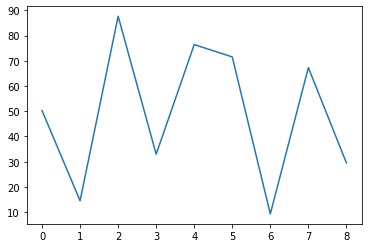

In [77]:
import matplotlib.pyplot as plt
plt.plot(series)
plt.show()#visualize the signal

In [142]:

series = np.sin(0.1*np.arange(100)) + np.random.randn(100)*0.7

"""
use above to visualize data manipulation with a sinwave instead 
"""

'\nuse above to visualize data manipulation with a sinwave instead \n'

In [143]:
# use T past values to predict the next value !!!!!!!
T = 3
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)#append features, past T values
  y = series[t+T]
  Y.append(y)#append lable ie current value



X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (97, 3) Y.shape (97,)


In [144]:
# X,Y

## VISUALIZE LABLES AND FEATURES

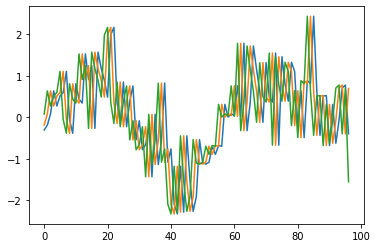

In [145]:
plt.plot(X)
plt.show()
# plt.plot(Y)
# plt.show()

In [146]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

In [147]:
### try autoregressive linear model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.1),
)

# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2],#TRAINING DATA
  epochs=80,
  validation_data=(X[-N//2:], Y[-N//2:]),#VALIDATION DATA SPLIT
)

Train on 48 samples, validate on 49 samples
Epoch 1/80
48/48 [==============================] - 0s 6ms/sample - loss: 5.3572 - val_loss: 2.1384
Epoch 2/80
48/48 [==============================] - 0s 391us/sample - loss: 3.2885 - val_loss: 1.4194
Epoch 3/80
48/48 [==============================] - 0s 347us/sample - loss: 2.0475 - val_loss: 1.0517
Epoch 4/80
48/48 [==============================] - 0s 304us/sample - loss: 1.2849 - val_loss: 0.9325
Epoch 5/80
48/48 [==============================] - 0s 379us/sample - loss: 1.0542 - val_loss: 0.9514
Epoch 6/80
48/48 [==============================] - 0s 441us/sample - loss: 1.0715 - val_loss: 1.0155
Epoch 7/80
48/48 [==============================] - 0s 348us/sample - loss: 1.2308 - val_loss: 1.0563
Epoch 8/80
48/48 [==============================] - 0s 389us/sample - loss: 1.2942 - val_loss: 1.0356
Epoch 9/80
48/48 [==============================] - 0s 461us/sample - loss: 1.2406 - val_loss: 0.9594
Epoch 10/80
48/48 [=====================

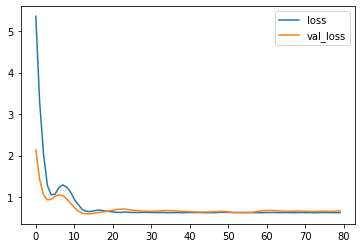

In [148]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [149]:
# Forecast future values (use only self-predictions for making future predictions)

validation_target = Y[-N//2:]
validation_predictions = []

# first validation input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
  validation_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

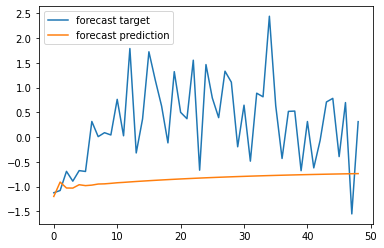

In [150]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [84]:
# RNN MODEL

In [120]:
X=X.reshape(-1, T, 1) # Now the data should be N x T x D

In [102]:
from tensorflow.keras.layers import SimpleRNN

In [121]:
### try autoregressive RNN model
i = Input(shape=(T,1))
x = SimpleRNN(15, activation='relu')(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.001),
)

# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2],
  epochs=80,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Train on 3 samples, validate on 4 samples
Epoch 1/80
3/3 [==============================] - 1s 447ms/sample - loss: 3815.2578 - val_loss: 1924.5553
Epoch 2/80
3/3 [==============================] - 0s 6ms/sample - loss: 3793.2258 - val_loss: 1912.1532
Epoch 3/80
3/3 [==============================] - 0s 7ms/sample - loss: 3771.1924 - val_loss: 1899.7255
Epoch 4/80
3/3 [==============================] - 0s 7ms/sample - loss: 3749.0188 - val_loss: 1887.2852
Epoch 5/80
3/3 [==============================] - 0s 8ms/sample - loss: 3726.7527 - val_loss: 1874.8239
Epoch 6/80
3/3 [==============================] - 0s 8ms/sample - loss: 3704.4089 - val_loss: 1862.3503
Epoch 7/80
3/3 [==============================] - 0s 7ms/sample - loss: 3681.6160 - val_loss: 1849.9905
Epoch 8/80
3/3 [==============================] - 0s 8ms/sample - loss: 3657.0847 - val_loss: 1837.6287
Epoch 9/80
3/3 [==============================] - 0s 8ms/sample - loss: 3632.4470 - val_loss: 1825.2609
Epoch 10/80
3/3 [===